# Exercise 3 : Exploratory Analysis


## Problem 1 : Analysis of Numeric Variables
### In this problem, your job is to analyze the following numeric variables in the dataset and their relationship with SalePrice.
### ['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea']
#### a) Which of these variables has the maximum number of outliers as per box-plot? How many outliers does it have?
#### b) Which of these variables is the most skewed from a regular normal distribution? Is the skew positive or negative?
#### c) Choose the top two variables that you think will help us the most in predicting ‘SalePrice’ of houses in this data.

#### Hints and Pointers
#### o In case of box-plot, outliers are the datapoints outside the whiskers, which are at Q1 – 1.5 IQR and Q3 + 1.5 IQR.
#### o Pandas has a bunch of statistical measures built in as methods/functions; .median() and .mean(), for example.
#### o Predicting one numeric variable with another numeric variable is easiest when they have a strong relationship.

In [2]:
# libraries

import pandas as pd
import numpy as np
import seaborn  as sb
import matplotlib.pyplot as plt
sb.set()

In [50]:
train_df = pd.read_csv("train.csv")
train_df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


In [19]:
Data = pd.DataFrame(train_df, columns=['LotArea', 'GrLivArea', 'TotalBsmtSF', 'GarageArea'])
LotArea = pd.DataFrame(train_df['LotArea'])
GrLivArea =  pd.DataFrame(train_df['GrLivArea'])
TotalBsmtSF = pd.DataFrame(train_df['TotalBsmtSF'])
GarageArea = pd.DataFrame(train_df['GarageArea'])
Data.head()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea
0,8450,1710,856,548
1,9600,1262,1262,460
2,11250,1786,920,608
3,9550,1717,756,642
4,14260,2198,1145,836


<AxesSubplot:>

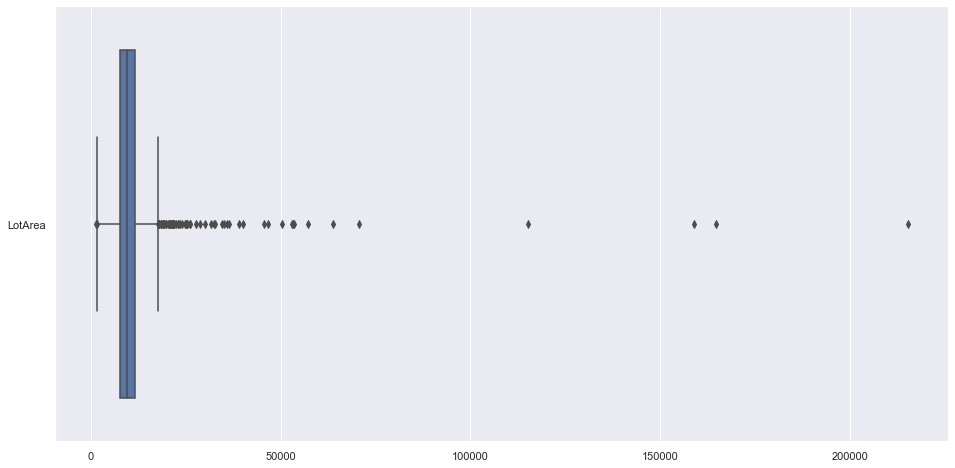

In [23]:
f = plt.figure(figsize=(16,8))
sb.boxplot(data = LotArea, orient =  "h")

<AxesSubplot:>

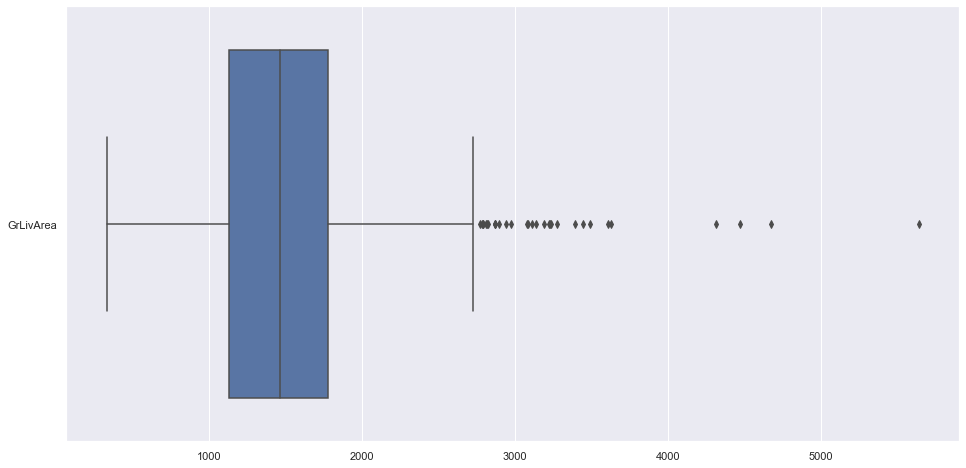

In [24]:
f = plt.figure(figsize=(16,8))
sb.boxplot(data = GrLivArea, orient =  "h")

<AxesSubplot:>

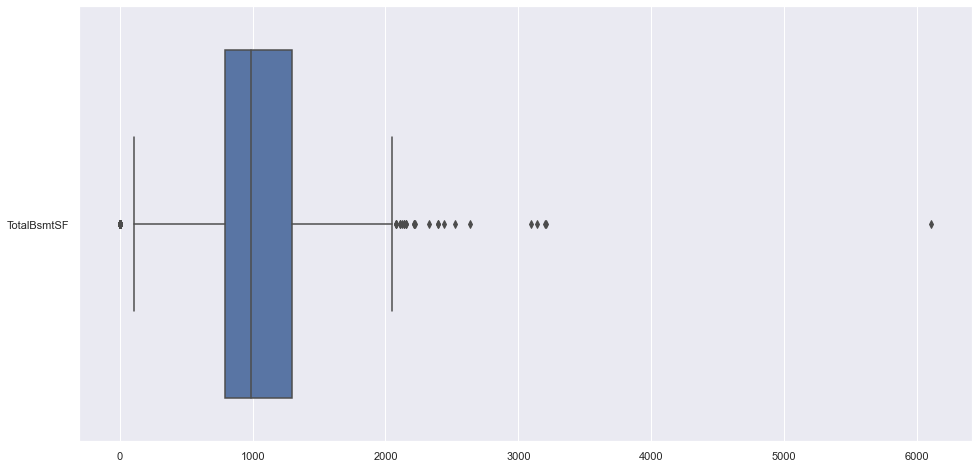

In [25]:
f = plt.figure(figsize=(16,8))
sb.boxplot(data = TotalBsmtSF, orient =  "h")

<AxesSubplot:>

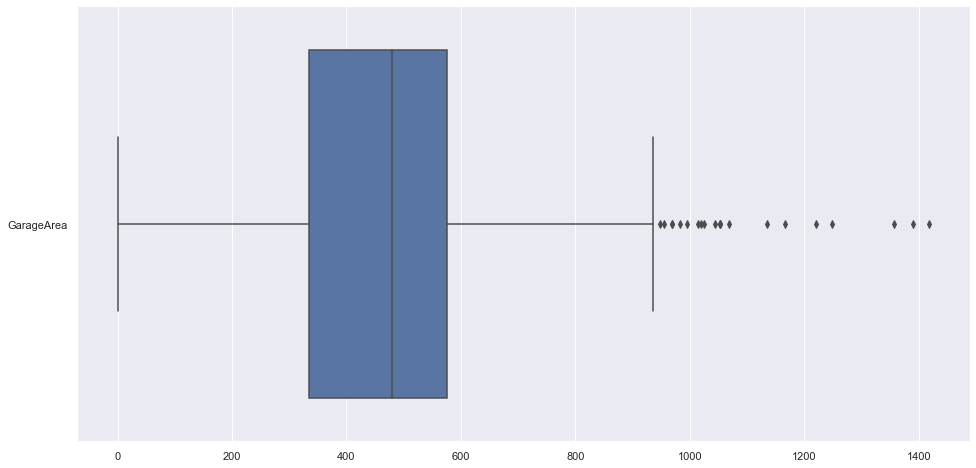

In [26]:
f = plt.figure(figsize=(16,8))
sb.boxplot(data = GarageArea, orient =  "h")

In [21]:
Q1 = Data.quantile(0.25)
Q3 = Data.quantile(0.75)
IQR = Q3 - Q1

In [22]:
((Data < (Q1 - 1.5 * IQR)) | (Data > (Q3 + 1.5 * IQR))).sum()

LotArea        69
GrLivArea      31
TotalBsmtSF    61
GarageArea     21
dtype: int64

### a) LotArea has the maximum number of outliers as seen from the box plot. It has 69 outliers.

,LotArea
count,1460.000000
mean,10516.828082
std,9981.264932
min,1300.000000
25%,7553.500000
50%,9478.500000
75%,11601.500000
max,215245.000000


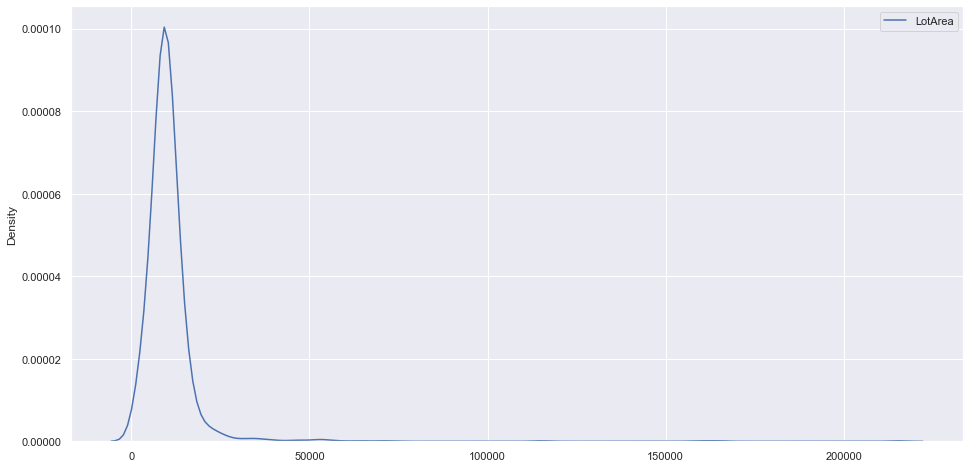

In [31]:
f = plt.figure(figsize=(16,8))
sb.kdeplot(data = LotArea)
LotArea.describe()

,GrLivArea
count,1460.000000
mean,1515.463699
std,525.480383
min,334.000000
25%,1129.500000
50%,1464.000000
75%,1776.750000
max,5642.000000


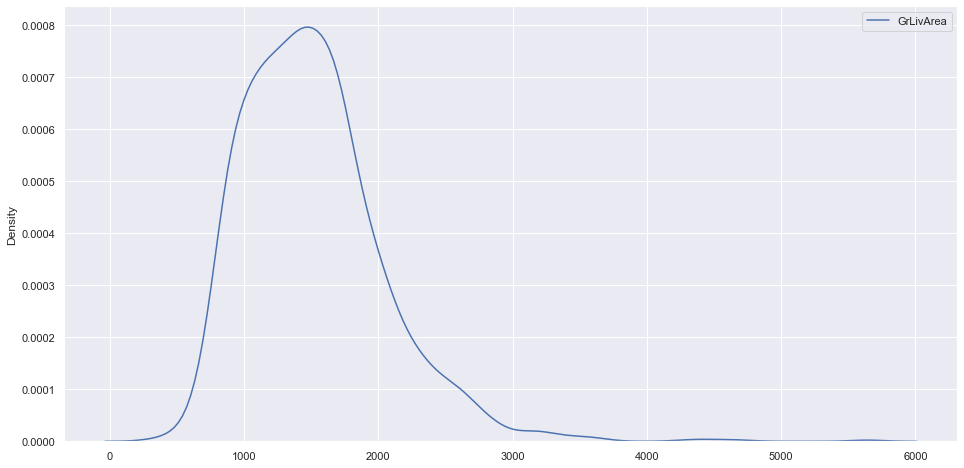

In [32]:
f = plt.figure(figsize=(16,8))
sb.kdeplot(data = GrLivArea)
GrLivArea.describe()

,TotalBsmtSF
count,1460.000000
mean,1057.429452
std,438.705324
min,0.000000
25%,795.750000
50%,991.500000
75%,1298.250000
max,6110.000000


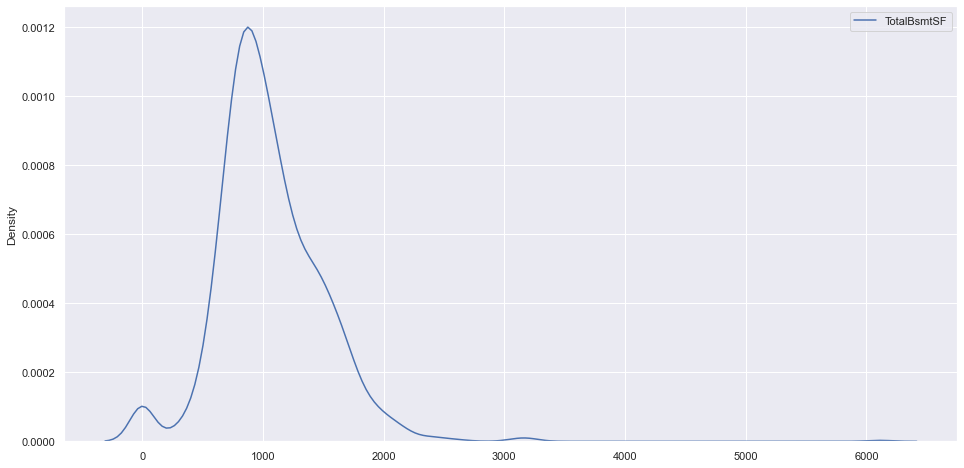

In [35]:
f = plt.figure(figsize=(16,8))
sb.kdeplot(data = TotalBsmtSF)
TotalBsmtSF.describe()

,GarageArea
count,1460.000000
mean,472.980137
std,213.804841
min,0.000000
25%,334.500000
50%,480.000000
75%,576.000000
max,1418.000000


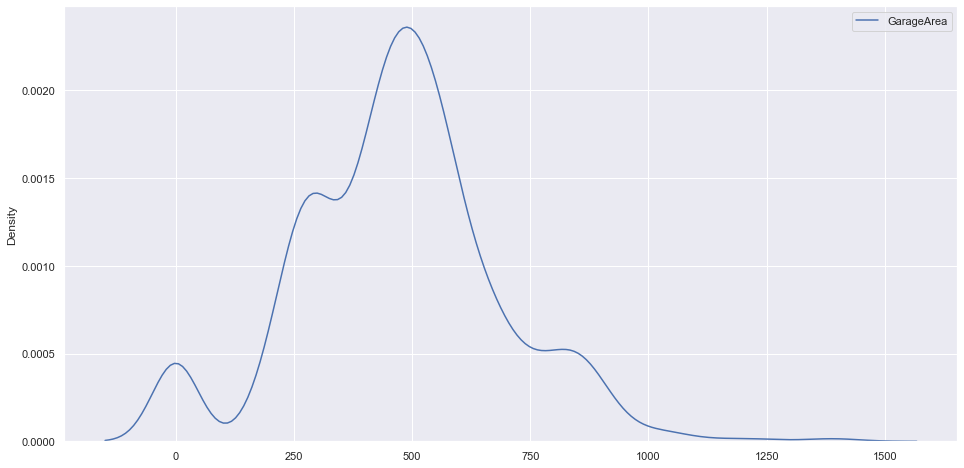

In [33]:
f = plt.figure(figsize=(16,8))
sb.kdeplot(data = GarageArea)
GarageArea.describe()

### b) LotArea has the most positive skewed distribution

In [36]:
Data.corr()

,LotArea,GrLivArea,TotalBsmtSF,GarageArea
LotArea,1.000000,0.263116,0.260833,0.180403
GrLivArea,0.263116,1.000000,0.454868,0.468997
TotalBsmtSF,0.260833,0.454868,1.000000,0.486665
GarageArea,0.180403,0.468997,0.486665,1.000000


### c) GarageArea and TotalBsmtSF has the strongest correlation coefficient of  0.486665, hence would help most in predicting SalePrice

# Problem 2 : Analysis of Categorical Variables
### In this problem, your job is to analyze the following categorical variables in the data and their relationship with SalePrice.
### ['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual']
#### a) Which of these variables has the highest number of levels? Which of the levels has the highest number of houses?
#### b) Choose the top two variables that you think will help us the most in predicting ‘SalePrice’ of houses in this data.
#### Hints and Pointers
#### o Levels for a categorical variable means the number of unique values. For example, gender has 3 levels, F, M, O.
#### o Each level of a categorical variable may contain a number of datapoints. For example, 14 M found in a dataset.
#### o When you want to find relationship between a numeric variable and a categorical one, you can’t do Correlation.
#### o Check box-plot function in seaborn carefully – there is a way to plot a numeric vs a categorical in the two axes.
#### o Think: If there was a relationship between Salary and Gender, what would box-plot of Salary be across F, M, O?

In [41]:
Data2 = pd.DataFrame(train_df, columns=['MSSubClass', 'Neighborhood', 'BldgType', 'OverallQual'])
Data2.head()

,MSSubClass,Neighborhood,BldgType,OverallQual
0,60,CollgCr,1Fam,7
1,20,Veenker,1Fam,6
2,60,CollgCr,1Fam,7
3,70,Crawfor,1Fam,7
4,60,NoRidge,1Fam,8


In [57]:
print(Data2['MSSubClass'].nunique())
print(Data2["MSSubClass"].value_counts())

15
20     536
60     299
50     144
120     87
30      69
160     63
70      60
80      58
90      52
190     30
85      20
75      16
45      12
180     10
40       4
Name: MSSubClass, dtype: int64


In [56]:
print(Data2['Neighborhood'].nunique())

print(Data2["Neighborhood"].value_counts())

25
NAmes      225
CollgCr    150
OldTown    113
Edwards    100
Somerst     86
Gilbert     79
NridgHt     77
Sawyer      74
NWAmes      73
SawyerW     59
BrkSide     58
Crawfor     51
Mitchel     49
NoRidge     41
Timber      38
IDOTRR      37
ClearCr     28
StoneBr     25
SWISU       25
MeadowV     17
Blmngtn     17
BrDale      16
Veenker     11
NPkVill      9
Blueste      2
Name: Neighborhood, dtype: int64


In [55]:
print(Data2['BldgType'].nunique())

print(Data2["BldgType"].value_counts())

5
1Fam      1220
TwnhsE     114
Duplex      52
Twnhs       43
2fmCon      31
Name: BldgType, dtype: int64


In [54]:
print(Data2['OverallQual'].nunique())

print(Data2["OverallQual"].value_counts())

10
5     397
6     374
7     319
8     168
4     116
9      43
3      20
10     18
2       3
1       2
Name: OverallQual, dtype: int64


### a) Neighborhood has the highest number of levels. Level 1Fam from variable BldgType has the highest number of houses

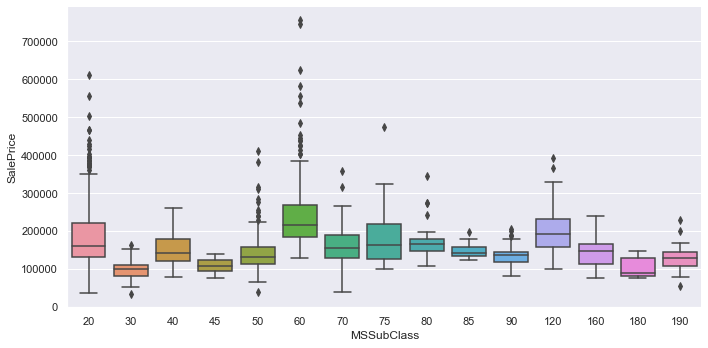

In [76]:
sb.catplot(x='MSSubClass', y='SalePrice', kind="box", data=train_df,height=5, aspect=2)

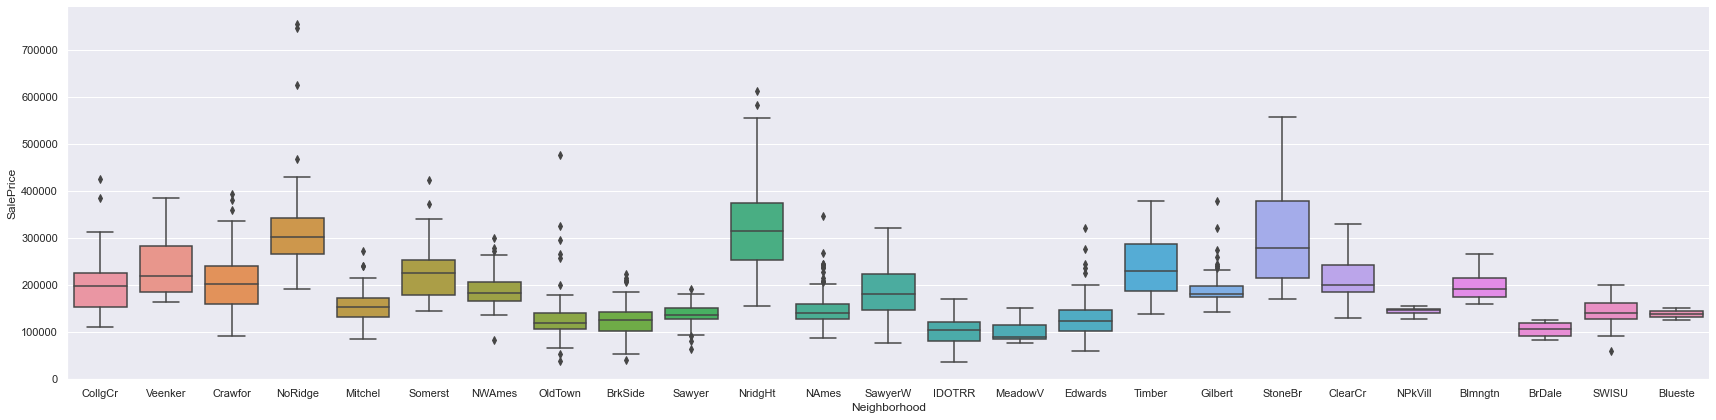

In [75]:
sb.catplot(x='Neighborhood', y='SalePrice', kind="box", data=train_df, height=6, aspect=4)

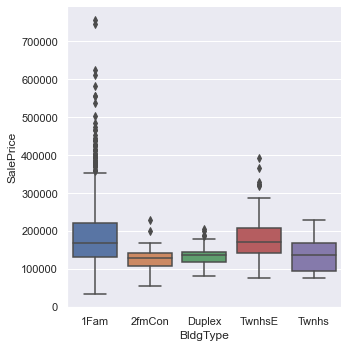

In [70]:
sb.catplot(x='BldgType', y='SalePrice', kind="box", data=train_df)

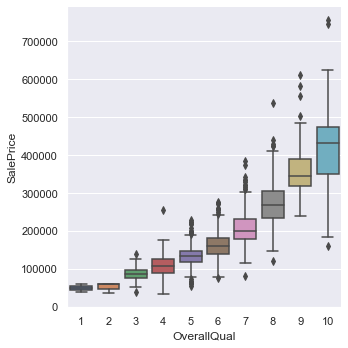

In [71]:
sb.catplot(x='OverallQual', y='SalePrice', kind="box", data=train_df)

###  Overall Quality and Bldg Type would seem  to help us the most.

# Problem 3 : Interesting Questions for EDA
### Choose any ONE of the following questions to answer. You may always try out the other one at home if you want. 
#### a) Does the SalePrice of a house get affected by whether it has a Garage or not? Justify your answer using EDA.
#### b) Does the SalePrice of a house get affected by how recently it got Remodeled? Justify your answer using EDA.

#### Hints and Pointers
#### o Check the data_description file very carefully and pick the variables you want to work with for these problems.
#### o In some cases, it is alright to create new variables out of the original ones, especially if they help you analyze.
#### o Do keep an eye out for missing values in the variables that you tackle and see what you can make out of those.

## a) Does the SalePrice of a house get affected by how recently it got Remodeled? Justify your answer using EDA.

In [20]:
Years = pd.DataFrame(train_df['YearRemodAdd'])
SalePrice = pd.DataFrame(train_df['SalePrice'])

In [21]:
Years.head()

,YearRemodAdd
0,2003
1,1976
2,2002
3,1970
4,2000


In [52]:
# subtracting from current year to determine age since remodelling
year = 2022 - Years
year.head()

,YearRemodAdd
0,19
1,46
2,20
3,52
4,22


In [69]:
# concatenate two variables
jointDF = pd.concat([SalePrice, year], axis = 1).reindex(SalePrice.index)

jointDF.isnull().sum()
# there are no missing values in the variables!

SalePrice       0
YearRemodAdd    0
dtype: int64

In [68]:
jointDF.describe()

,SalePrice,YearRemodAdd
count,1460.000000,1460.000000
mean,180921.195890,37.134247
std,79442.502883,20.645407
min,34900.000000,12.000000
25%,129975.000000,18.000000
50%,163000.000000,28.000000
75%,214000.000000,55.000000
max,755000.000000,72.000000


In [64]:
jointDF

,SalePrice,YearRemodAdd
0,208500,19
1,181500,46
2,223500,20
3,140000,52
4,250000,22
5,143000,27
6,307000,17
7,200000,49
8,129900,72
9,118000,72


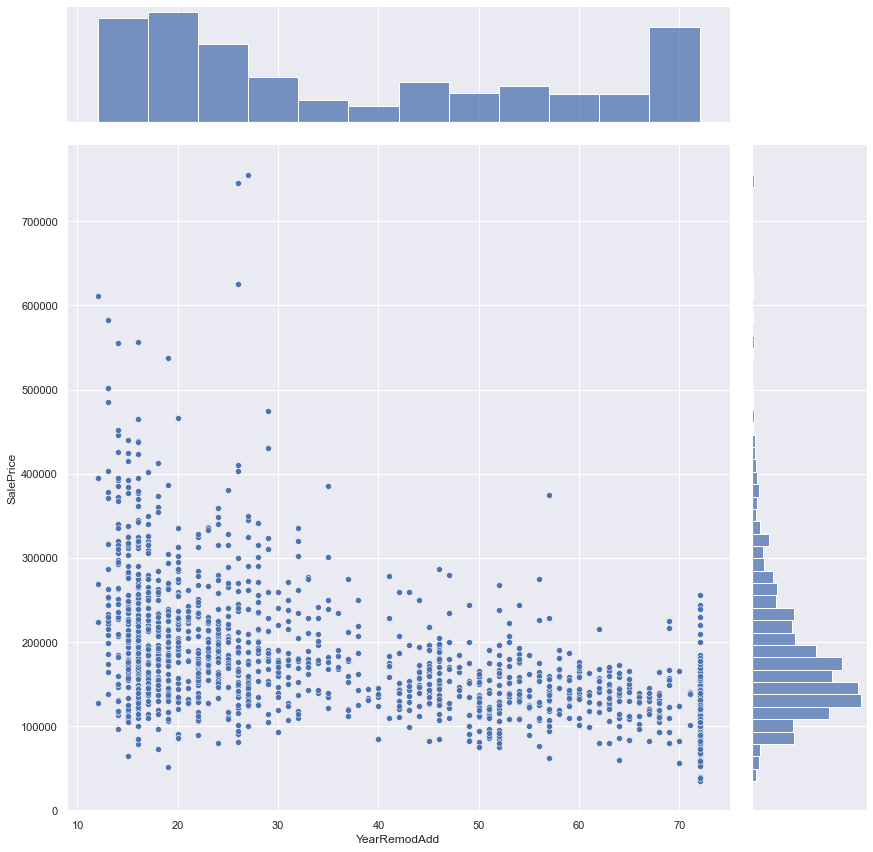

In [65]:
# jointplot of two variables
sb.jointplot(data = jointDF, x = "YearRemodAdd", y = "SalePrice", height = 12)

In [55]:
# correlation coefficient of two variables
jointDF.corr()

,SalePrice,YearRemodAdd
SalePrice,1.000000,-0.507101
YearRemodAdd,-0.507101,1.000000


<AxesSubplot:>

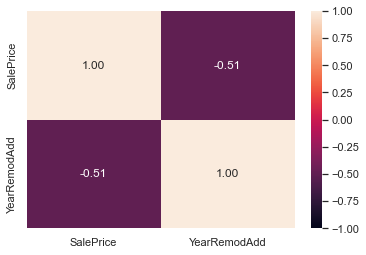

In [56]:
# heatmap of SalePrice vs Age since remodelling
sb.heatmap(jointDF.corr(), vmin = -1, vmax = 1, annot = True, fmt=".2f")

#### b)  The  SalePrice of a  house is moderately negatively correlated to how recent it got remodeled. By subtracting the current year from the year it was remodeled, the age since it was remodeled is then compared against the SalePrice. 